In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/Users/adityadhanrajsingh/Desktop/75_day_aiml_challenge/day3/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
cols_with_zero=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df[cols_with_zero]=df[cols_with_zero].replace(0,np.nan)
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
df.fillna(df.mean(),inplace=True)
#option 2 is df.fillna(df.median(),inplace=True)

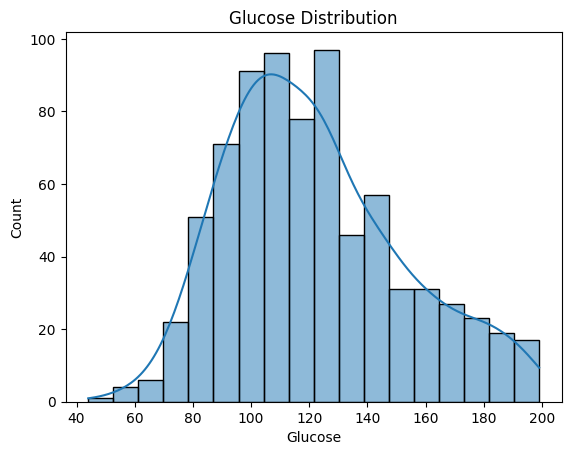

In [6]:
sns.histplot(df['Glucose'],kde=True)
plt.title("Glucose Distribution")
plt.show()

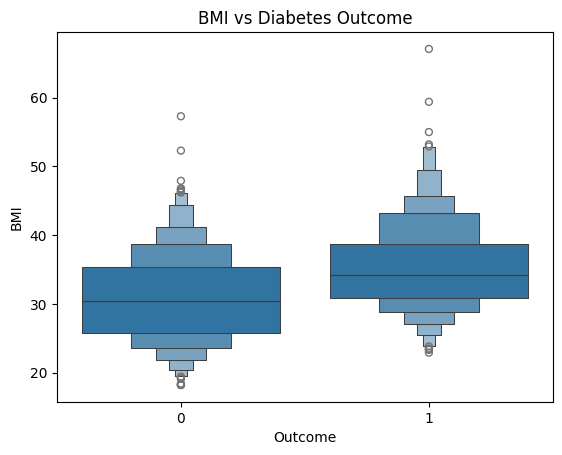

In [7]:
sns.boxenplot(x='Outcome',y='BMI',data=df)
plt.title("BMI vs Diabetes Outcome")
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
df[scaled_columns] = scaler.fit_transform(df[scaled_columns])


In [10]:
from sklearn.model_selection import train_test_split
X=df.drop('Outcome',axis=1)
y=df['Outcome']
X_Train,X_Test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
X_Train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,-1.239039,1.175571e-15,8.087936e-16,-3.345079e-16,0.000000,0.304,-1.041549
618,9,-0.318475,7.937164e-01,-5.866013e-01,-3.345079e-16,-0.619657,1.282,1.425995
346,1,0.569212,-2.184328e+00,-1.155739e+00,-8.538527e-01,-0.546884,0.654,-0.956462
294,0,1.292513,-1.853434e+00,8.087936e-16,-3.345079e-16,-1.536598,0.254,2.702312
231,6,0.404826,6.282695e-01,8.931573e-01,2.523979e+00,2.000173,0.238,1.085644


In [15]:
X_Test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,-0.778757,-1.191647,4.378470e-01,4.054785e-01,0.224510,0.430,0.830381
324,2,-0.318475,0.214652,3.240194e-01,-3.345079e-16,0.471939,0.148,-1.041549
624,2,-0.449984,-0.695306,8.087936e-16,-3.345079e-16,-0.241237,0.158,-1.041549
690,8,-0.482861,0.628269,8.087936e-16,-3.345079e-16,-1.143623,0.856,0.064591
473,7,0.470581,1.455504,8.087936e-16,-3.345079e-16,-0.372229,0.210,1.425995
